# Graphs for Paper

## Pt. 1: Visualizing ChIP-seq Data
We have a lot of ChIP-seq data. Let's take a look at what exactly it looks like.

In [3]:
import matplotlib.pyplot as plt
from threading import Thread
import numpy as np
import RELI as R
from RELI import RELI, LoadedData
import math
R.DEBUG = False

In [2]:
# Get list of all the locations of these ChIP-seqs + plot all this
sample = "hg19_0302"
data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

In [28]:
new_data = []
for d in data:
    for dd in d:
        new_data.append(dd)
num_bins = int(len(set(new_data)) / 100)
val = max(new_data)
new_data = new_data[:(val * val)]
new_data[:10], len(new_data), math.sqrt(len(new_data)), num_bins

([740594,
  740595,
  740596,
  740597,
  740598,
  740599,
  740600,
  740601,
  740602,
  740603],
 21673414,
 4655.4714047022135,
 204377)

In [29]:
num_overlaps = np.zeros(val)

for i in range(len(new_data)):
    num_overlaps[new_data[i] - 1] += 1

num_overlaps

array([0., 0., 0., ..., 1., 1., 1.])

In [30]:
v = int(math.sqrt(val))
num_overlaps = num_overlaps[:(v * v)]
num_overlaps = num_overlaps.reshape((v, v))

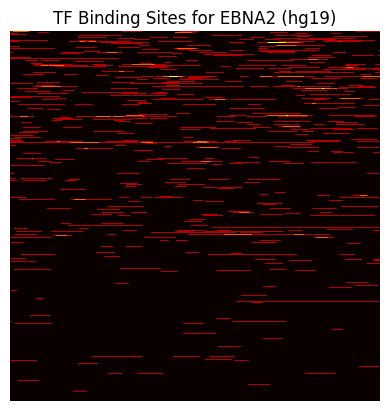

In [31]:
plt.title("TF Binding Sites for EBNA2 (hg19)")
plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
plt.axis("off")
plt.savefig("tfbs_EBNA2.png")
plt.show()

In [199]:
import os
samples = os.listdir("sample_data/ChIP-seq")
v = [line.split("\t")[3] for line in open("sample_data/ChIPseq.index").readlines()]

Analyzing sample: hg19_0001


KeyboardInterrupt: 

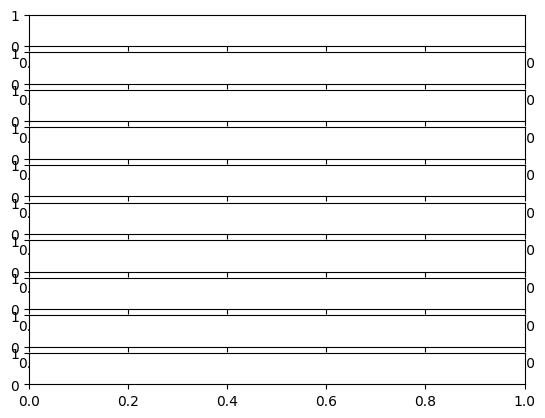

In [200]:
indices = []
fig, axes = plt.subplots(10, 1)

for i, sample in enumerate(samples[:10]):
    print(f"Analyzing sample: {sample}")
    data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

    print("Appending data...")
    new_data = []
    for d in data:
        for dd in d:
            new_data.append(dd)
    num_bins = int(len(set(new_data)) / 100)
    val = max(new_data)
    print("Plotting...")

    # plt.title(F"TF Binding Sites for {v[i]} ({sample})")
    # plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
    axes[i].hist(new_data, bins=250)
    axes[i].axis("off")

plt.show()

In [71]:
from pathlib import Path
import os

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("output_Vitiligo")

info = []
files = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"output_Vitiligo/{file}")
    if vitiligo_file.is_dir():
        sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
        sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
        sle_sum = {x[0]: float(x[1]) for x in sle_summary}
        
        vitiligo_rsids = list([l.strip() for l in open(f"output_Vitiligo/{file}" + "/result.rsids").readlines()])
        vitiligo_summary = [l.strip().split(": ") for l in open(f"output_Vitiligo/{file}" + "/summary.txt").readlines()[4:]]
        vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}
        
        print(F"Comparing vitiligo + SLE results for {file}")
        # Compare the # they have in common
        if (vitiligo_sum["P Value"] > 0.3 or sle_sum["P Value"] > 0.3) or (vitiligo_sum["Mean"] < 0 or sle_sum["Mean"] < 0):
            continue
        # Correcting error in the code
        
        info.append([vitiligo_sum["Mean"], sle_sum["Mean"], vitiligo_sum["Std"], sle_sum["Std"]])
        files.append(file)
    else:
        print(f"Not there: {file}")

list(zip(files, info))

Comparing vitiligo + SLE results for ARID3A - hg19_0021
Comparing vitiligo + SLE results for ATF1 - hg19_0027
Not there: BATF - hg19_0042
Comparing vitiligo + SLE results for BCL3 - hg19_0050
Not there: BRD4 - hg19_0076
Not there: BRD4 - hg19_0101
Comparing vitiligo + SLE results for CEBPA - hg19_0134
Not there: CTCF - hg19_0182
Not there: CTCF - hg19_0190
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Comparing vitiligo + SLE results for CTCF - hg19_0233
Comparing vitiligo + SLE results for CTCF - hg19_0234
Comparing vitiligo + SLE results for CTCF - hg19_0239
Comparing vitiligo + SLE results for CTCF - hg19_0253
Comparing vitiligo + SLE results for CTCF - hg19_0254
Not there: E2F6 - hg19_0290
Not there: EBNA2 - hg19_0302
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Comparing vitiligo + SLE results for ELF1 - hg19_0314
Comparing vitiligo + SLE results for ELF2 - hg19_0323
Not there: EP300 - hg19_0340
Comparing vitiligo + SLE results for EP300 - hg19_0343
Comparing 

[('ARID3A - hg19_0021',
  [2.6956521739130435,
   2.32967032967033,
   1.7413529027714945,
   1.5196081044824734]),
 ('CEBPA - hg19_0134',
  [5.506246876561719,
   5.320679320679321,
   2.2996612220397576,
   2.0347142153289997]),
 ('CTCF - hg19_0233',
  [6.992503748125937,
   6.397602397602397,
   2.622404483574791,
   2.156792582923601]),
 ('FOS - hg19_1543',
  [1.3683158420789605,
   2.7092907092907095,
   1.1739193195911979,
   1.6602420294654678]),
 ('FOXA1 - hg19_0481',
  [0.5387306346826587,
   9.18981018981019,
   0.7571905434872122,
   7.130533907571874]),
 ('POLR2A - hg19_1540',
  [9.610694652673663,
   5.663336663336663,
   3.1855598678067105,
   2.1843865169755206]),
 ('RAD21 - hg19_1037',
  [3.269865067466267,
   3.7002997002997002,
   1.7976430878927006,
   1.705898563833711]),
 ('SP4 - hg19_1245',
  [1.1604197901049476,
   1.040959040959041,
   1.0886505608625416,
   1.0115931392218336]),
 ('SRF - hg19_1276',
  [0.9870064967516242,
   1.0274725274725274,
   1.00961449263

In [99]:
from pathlib import Path
import os

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")

info = []
files = []
keep = []

# JUST SLE
def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
    sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
    sle_sum = {x[0]: float(x[1]) for x in sle_summary}

    if sle_sum["P Value"] > 0.05 or sle_sum["Mean"] < 0 or file.split(" - ")[0] in keep:
        continue
    
    info.append([sle_sum["Mean"], sle_sum["Std"]])
    files.append(file)
    keep.append(file.split(" - ")[0])

list(zip(files, info))

[('ARID3A - hg19_0021', [2.32967032967033, 1.5196081044824734]),
 ('BRD4 - hg19_0076', [3.032967032967033, 1.670901579361297]),
 ('CEBPA - hg19_0134', [5.320679320679321, 2.0347142153289997]),
 ('CTCF - hg19_0182', [5.511488511488512, 2.0327611473357803]),
 ('E2F6 - hg19_0290', [0.8751248751248751, 0.9248732936952044]),
 ('EBNA2 - hg19_0302', [4.355322338830585, 1.9429829923459718]),
 ('EGR1 - hg19_0305', [1.4915084915084915, 1.2158033649311186]),
 ('ELF1 - hg19_0312', [3.274225774225774, 2.530024607136973]),
 ('FOS - hg19_1543', [2.7092907092907095, 1.6602420294654678]),
 ('GATA1 - hg19_0536', [1.2657342657342658, 1.1069393322647305]),
 ('HMGN1 - hg19_0607', [9.881118881118882, 2.5410338736138756]),
 ('IRF1 - hg19_0640', [3.827172827172827, 1.8582521085958421]),
 ('JUN - hg19_0665', [1.1668331668331668, 1.0560013547050258]),
 ('MYC - hg19_0787', [1.7752247752247752, 1.2451608628709674]),
 ('NFATC1 - hg19_0837', [1.873126873126873, 1.315631830295664]),
 ('NFE2 - hg19_0838', [1.01448551

In [100]:
print("\n".join([x.split(" - ")[0] for x in files]))

ARID3A
BRD4
CEBPA
CTCF
E2F6
EBNA2
EGR1
ELF1
FOS
GATA1
HMGN1
IRF1
JUN
MYC
NFATC1
NFE2
PML
POLR2A
REST
SIN3A
SMARCA4
SMC3
SP1
SP4
SPI1
SRF
WRNIP1
YY1


In [110]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
pbc = os.listdir("output_PBC")
ra = os.listdir("output_RA")

info = []
files = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"output_Vitiligo/{file}")
    if vitiligo_file.is_dir():
        pbc_file = Path(f"output_PBC/{file}")
        ra_file = Path(f"output_RA/{file}")
        if pbc_file.is_dir() and ra_file.is_dir():
            sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
            sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
            sle_sum = {x[0]: float(x[1]) for x in sle_summary}
            
            vitiligo_rsids = list([l.strip() for l in open(f"output_Vitiligo/{file}" + "/result.rsids").readlines()])
            vitiligo_summary = [l.strip().split(": ") for l in open(f"output_Vitiligo/{file}" + "/summary.txt").readlines()[4:]]
            vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}

            pbc_rsids = list([l.strip() for l in open(f"output_PBC/{file}" + "/result.rsids").readlines()])
            pbc_summary = [l.strip().split(": ") for l in open(f"output_PBC/{file}" + "/summary.txt").readlines()[4:]]
            pbc_sum = {x[0]: float(x[1]) for x in pbc_summary}

            ra_rsids = list([l.strip() for l in open(f"output_RA/{file}" + "/result.rsids").readlines()])
            ra_summary = [l.strip().split(": ") for l in open(f"output_RA/{file}" + "/summary.txt").readlines()[4:]]
            ra_sum = {x[0]: float(x[1]) for x in ra_summary}
            
            print(F"Comparing vitiligo + SLE results for {file}")
            # Compare the # they have in common
            info.append([vitiligo_sum["P Value"] - 0.5, sle_sum["P Value"] - 0.5, pbc_sum["P Value"] - 0.5, ra_sum["P Value"] - 0.5])
            files.append(file)
    else:
        print(f"Not there: {file}")

info

Not there: BATF - hg19_0042
Not there: BRD4 - hg19_0076
Not there: BRD4 - hg19_0101
Not there: CTCF - hg19_0182
Not there: CTCF - hg19_0190
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Not there: E2F6 - hg19_0290
Not there: EBNA2 - hg19_0302
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Not there: EP300 - hg19_0340
Not there: EP300 - hg19_0352
Not there: EP300 - hg19_0360
Not there: ESR1 - hg19_0386
Not there: EZH2 - hg19_0438
Not there: FOXH1 - hg19_0505
Not there: GABPA - hg19_0519
Not there: GATA1 - hg19_0536
Not there: GATA1 - hg19_0537
Not there: HMGN1 - hg19_0607
Not there: HOXA7 - hg19_0624
Not there: HOXC6 - hg19_0625
Not there: IRF1 - hg19_0640
Not there: IRF3 - hg19_0644
Not there: IRF3 - hg19_0645
Not there: IRF3 - hg19_0646
Not there: IRF4 - hg19_0649
Not there: JUN - hg19_0665
Not there: JUN - hg19_0666
Not there: KLF4 - hg19_0683
Not there: MAX - hg19_0706
Not there: MAX - hg19_0714
Not there: MED12 - hg19_0745
Not there: MYC - hg19_0775
Not there: MY

[]

In [107]:
inf = list(zip(info, files))
print(inf)
inf.sort(reverse=True)

info, files = zip(*inf)
info = np.array(info)
info

[([0.2358623710249237, 0.0, 0.0, 0.0], 'ELF1 - hg19_0314'), ([0.2849494321294115, 0.0, 0.0, 0.0], 'EP300 - hg19_0343'), ([0.31579468543375877, 0.0, 0.0, 0.0], 'ETS1 - hg19_0412'), ([-0.20474545628833396, -0.4999999999947923, 0.0, 0.0], 'FOS - hg19_1543'), ([0.3452303597992752, 0.0, 0.0, 0.0], 'GABPA - hg19_0514'), ([-0.00012792882227774527, -0.4999999999996313, 0.0, 0.0], 'NFATC1 - hg19_1544'), ([0.24642968866108306, -0.3550643439179162, 0.0, 0.0], 'NFATC2 - hg19_1541'), ([0.19669270351139323, 0.0, 0.0, 0.0], 'NFKB1 - hg19_1542'), ([-0.5, -0.5, 0.0, 0.0], 'POLR2A - hg19_1540'), ([-0.4999996569458729, -0.499999689207642, 0.0, 0.0], 'SRF - hg19_1276')]


array([[ 3.45230360e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.15794685e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.84949432e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.46429689e-01, -3.55064344e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 2.35862371e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.96692704e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.27928822e-04, -5.00000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [-2.04745456e-01, -5.00000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [-4.99999657e-01, -4.99999689e-01,  0.00000000e+00,
         0.00000000e+00],
       [-5.00000000e-01, -5.00000000e-01,  0.00000000e+00,
         0.00000000e+00]])

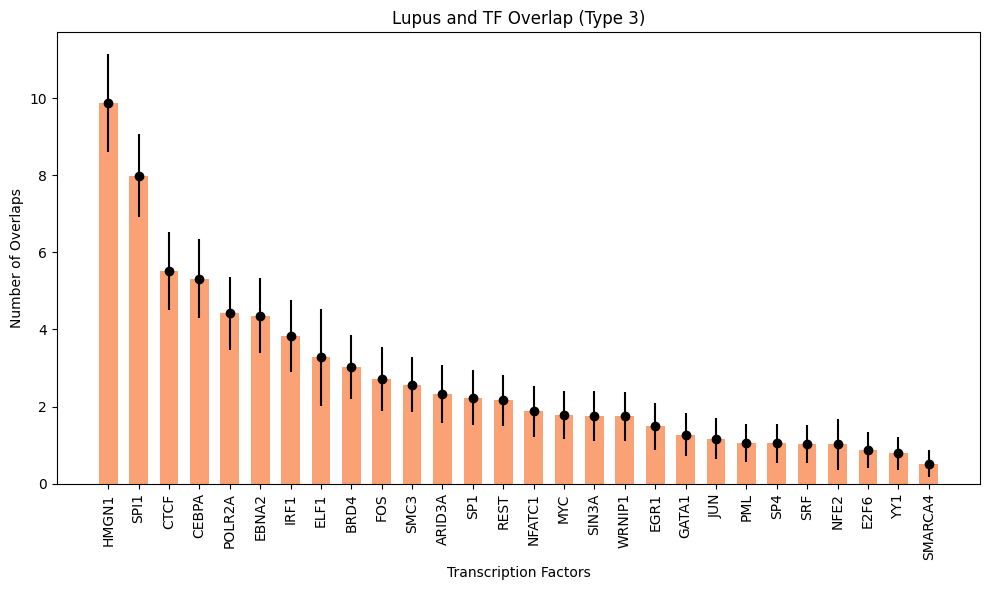

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))

info = np.array(info)
sle = [float(x) for x in info[:,0]]
# sle = [float(x) for x in info[:,1]]

# std_vitiligo = [float(x) / 2 for x in info[:,2]]
std_sle = [float(x) / 2 for x in info[:,-1]]

# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]

x = np.array([x * 1.3 for x in list(range(len(sle)))])
ax.set_ylabel("Number of Overlaps")
ax.set_xlabel("Transcription Factors")
plt.xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])
ax.bar(x, sle, width=0.8, color='#FAA275', align='center', label="SLE")
# ax.bar(x + 0.25, vitiligo, width=0.5, color='#985277', align='center', label="Vitiligo")

plt.errorbar(x, sle, std_sle, linestyle='None', marker='o', color="black")
# plt.errorbar(x + 0.25, vitiligo, std_vitiligo, linestyle='None', marker='o', color="black")

# ax.bar(x + 0.05, pbc, width=0.1, color='#C33C54', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.15, ra, width=0.1, color='#FCD0A1', align='center', label="RA (Type 2)")

ax.set_title("Lupus and TF Overlap")
# ax.legend(loc="best")
plt.tight_layout()
plt.savefig("figures/avg_sle.png")
plt.show()

TypeError: list indices must be integers or slices, not tuple

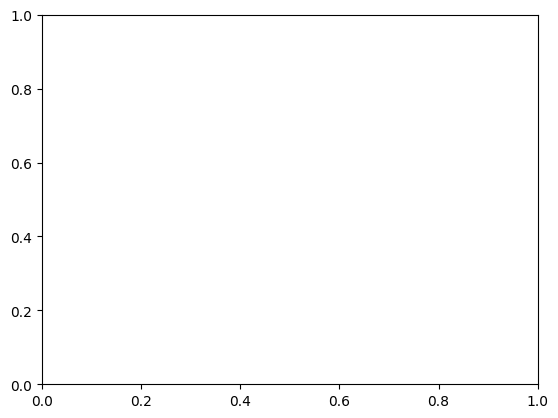

In [92]:
fig, ax = plt.subplots()

vitiligo = [float(x) for x in info[:,0]]
sle = [float(x) for x in info[:,1]]
pbc = [float(x) for x in info[:,2]]
ra = [float(x) for x in info[:,3]]

x = np.array([x * 1.1 for x in list(range(len(vitiligo)))])
ax.set_ylabel("Relative Risk")
ax.set_xlabel("Transcription Factors")

plt.xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])
ax.bar(x - 0.35, sle, width=0.2, color='#74bfdf', align='center', label="SLE (Type 3)")
ax.bar(x - 0.15, vitiligo, width=0.2, color='#3c9cd0', align='center', label="Vitiligo (Type 3)")
ax.bar(x + 0.15, pbc, width=0.2, color='#da8c9b', align='center', label="PBC (Type 2)")
ax.bar(x + 0.35, ra, width=0.2, color='#851e61', align='center', label="RA (Type 2)")

ax.set_title("Autoimmune Disease and TF Overlap Significance (Types 2 and 3)")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("relative_risk_type23_analysis.png")
plt.show()

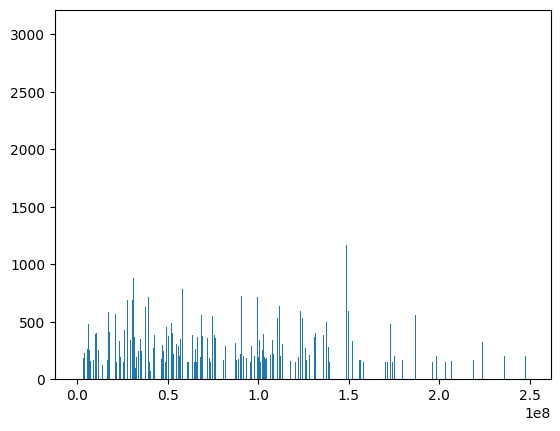

In [12]:
# Summarize down information into table
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("mas_type3")

info = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"mas_type3/{file}")
    if vitiligo_file.is_dir():
        sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
        sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
        sle_sum = {x[0]: float(x[1]) for x in sle_summary}
        
        vitiligo_rsids = list([l.strip() for l in open(f"mas_type3/{file}" + "/result.rsids").readlines()])
        vitiligo_summary = [l.strip().split(": ") for l in open(f"mas_type3/{file}" + "/summary.txt").readlines()[4:]]
        vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}
        
        print(F"Comparing vitiligo + SLE results for {file}")
        # Compare the # they have in common
        info.append([vitiligo_sum["Relative Risk"], sle_sum["Relative Risk"], file])
    else:
        print(f"Not there: {file}")


## Pt. 2: Run RELI on ALL Data
This will likely take several hours.

Analyzing SNP Significance for SLE

In [106]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")

sle_info = []
sle_tf = []
sle_rsid_list = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
    sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[1:]]
    sle_sum = {x[0]: float(x[1]) if x[1].replace('.','',1).isdigit() else x[1] for x in sle_summary}

    # Compare the # they have in common
    sle_info.append([sle_sum["P Value"], sle_sum["Relative Risk"]])
    sle_tf.append(sle_sum["TF"])
    sle_rsid_list.append(sle_rsids)

sle_info = np.array(sle_info, dtype=float)
sle_info

array([[7.86083998e-03, 2.57547170e+00],
       [5.00000000e-01, 1.79256827e+00],
       [5.00000000e-01, 2.57326478e+00],
       [5.00000000e-01, 0.00000000e+00],
       [4.01210144e-08, 3.95652174e+00],
       [8.02764336e-05, 2.44329703e+00],
       [4.30678160e-02, 1.63295269e+00],
       [4.56453425e-01, 1.04926625e+00],
       [1.00071335e-01, 1.39259878e+00],
       [5.00000000e-01, 1.94105100e-01],
       [4.74342775e-02, 1.56308557e+00],
       [9.08465903e-01, 6.00620021e-01],
       [8.34012488e-01, 7.55788591e-01],
       [4.21605884e-02, 1.62026546e+00],
       [5.00000000e-01, 6.48016277e-01],
       [1.07957867e-02, 3.42808219e+00],
       [4.00950805e-29, 5.96970740e+00],
       [2.62552243e-15, 7.37508372e+00],
       [1.13043109e-03, 3.35957285e+00],
       [5.00000000e-01, 2.13341858e+00],
       [5.00000000e-01, 3.92549020e+00],
       [5.00000000e-01, 7.70236996e-01],
       [5.00000000e-01, 2.86000000e+00],
       [5.00000000e-01, 8.08888889e-01],
       [5.000000

In [117]:
# Go through each line + get list of all RSIDs we matched on
sle_pvals = sle_info[:,0]

all_rsids = []

for rsid_list in sle_rsid_list:
    for rsid in rsid_list:
        all_rsids.append(rsid)

all_rsids = list(set(all_rsids))
# all_rsids.sort()

all_rsids, len(all_rsids)

(['rs57095329',
  'rs460106',
  'rs2524099',
  'rs6984496',
  'rs767448',
  'rs142836782',
  'rs3807307',
  'rs3131381',
  'rs1058026',
  'rs28403951',
  'rs17533090',
  'rs3214973',
  'rs3807306',
  'rs33969397',
  'rs9894370',
  'rs11602895',
  'rs1150757',
  'rs112743130',
  'rs12355313',
  'rs12311303',
  'rs3778753',
  'rs4693800',
  'rs35105110',
  'rs3834310',
  'rs1143679',
  'rs9908694',
  'rs3763305',
  'rs148444157',
  'rs6904996',
  'rs9357155',
  'rs3778752',
  'rs11059927',
  'rs2250788',
  'rs3862468',
  'rs112771360',
  'rs80022860',
  'rs12924667',
  'rs113894104',
  'rs4948496',
  'rs3893661',
  'rs41508750',
  'rs2251056',
  'rs34616325',
  'rs1385374',
  'rs34291217',
  'rs9271588',
  'rs2393743',
  'rs4840525',
  'rs71542490',
  'rs112876941',
  'rs6479781',
  'rs12937330',
  'rs5753607',
  'rs1861548',
  'rs2296362',
  'rs923077',
  'rs34377413',
  'rs6903608',
  'rs9888879',
  'rs12709364',
  'rs1270942',
  'rs558702',
  'rs2230926',
  'rs13106926',
  'rs6479782'

C:\Users\sarah\AppData\Local\Temp\ipykernel_33164\3222143465.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


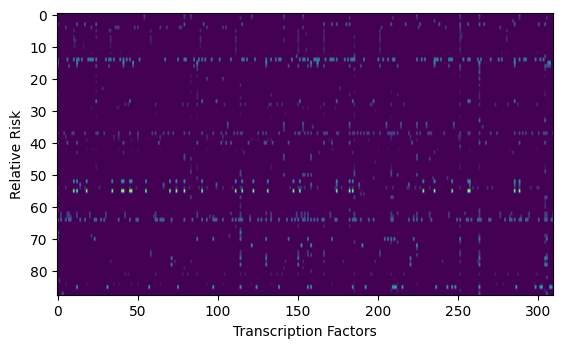

In [158]:
# Now go through the list of all TFs; if we see a value, set it to the pval
heatmap = []
num_rsids = len(all_rsids)

for [pval, rel_risk], tf, rsid_list in zip(sle_info, sle_tf, sle_rsid_list):
    # Get location of each RSID in sle_tf and turn on
    ind = []
    for rsid in rsid_list:
        ind.append(all_rsids.index(rsid))
    
    if rel_risk <= 0.5:
        continue
    heatmap.append([rel_risk if i in ind else 0 for i in range(num_rsids)])

plt, ax = plt.subplots()

ax.set_ylabel("Relative Risk")
ax.set_xlabel("Transcription Factors")
ax.imshow(heatmap, aspect=2)

plt.show()